In [1]:
import os
os.environ['KAGGLE_USERNAME'] = "jhansiravichand" # username from the json file
os.environ['KAGGLE_KEY'] = "aa9652c4fbea305d129ea5a7bf0f933c" # key from the json file
!kaggle competitions download -c dogs-vs-cats # api copied from kaggle (https://www.kaggle.com/c/dogs-vs-cats/data)

 98% 265M/271M [00:02<00:00, 105MB/s] 
100% 271M/271M [00:02<00:00, 99.6MB/s]
  0% 0.00/86.8k [00:00<?, ?B/s]
100% 86.8k/86.8k [00:00<00:00, 91.4MB/s]
 98% 532M/543M [00:02<00:00, 222MB/s]
100% 543M/543M [00:02<00:00, 217MB/s]


In [2]:
# Unzip training data
from zipfile import ZipFile
file_name = "/content/train.zip"
with ZipFile(file_name, 'r') as zip:
  zip.extractall()
  print('done')

done


In [59]:
# Get all the paths
data_dir_list = os.listdir('/content/train')
#print(data_dir_list)
path, dirs, files = next(os.walk("/content/train"))
file_count = len(files)
print(file_count)

25000


In [6]:
# Make new base directory
original_dataset_dir = '/content/train'
base_dir = '/content/cats_and_dogs_small'
os.mkdir(base_dir)

In [7]:
# creating 3 separate directories for train, validation and test under 'cats_and_dogs_small' directory
train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)

validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)

test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)

In [11]:
import shutil
# creating a list of first 1000 cat image file names eg: cat.0.jpg, cat.1.jpg .... cat.999.jpg.
fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname) # '/content/train/cat.0.jpg'
    dst = os.path.join(train_dir, fname)            # '/content/cats_and_dogs_small/train/cat.o.jpg'
    #print(src,dst)
    shutil.copyfile(src, dst)                       # copying image from source directory to training directory


# taking nect 500 (1000 to 1500) images of cats for validation    
fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_dir, fname)
    shutil.copyfile(src, dst)

# and the next 500 images(1500 to 2000) for testing
fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_dir, fname)
    shutil.copyfile(src, dst)

# similarly we create train, validation and test data for dog class   
fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_dir, fname)
    shutil.copyfile(src, dst)

In [12]:
data_dir_list = os.listdir('/content/cats_and_dogs_small/train')
print(data_dir_list)
path, dirs, files = next(os.walk("/content/cats_and_dogs_small/train"))
file_count = len(files)
print(file_count)
# we can see that train directory has 1000 images of cats and 1000 images of dogs

['cat.586.jpg', 'dog.558.jpg', 'dog.92.jpg', 'cat.444.jpg', 'cat.791.jpg', 'cat.781.jpg', 'cat.953.jpg', 'cat.70.jpg', 'dog.1.jpg', 'cat.748.jpg', 'dog.57.jpg', 'dog.841.jpg', 'dog.196.jpg', 'cat.295.jpg', 'dog.812.jpg', 'cat.683.jpg', 'cat.153.jpg', 'dog.452.jpg', 'dog.495.jpg', 'cat.660.jpg', 'dog.643.jpg', 'dog.465.jpg', 'cat.892.jpg', 'dog.792.jpg', 'cat.129.jpg', 'dog.32.jpg', 'cat.549.jpg', 'cat.127.jpg', 'cat.144.jpg', 'dog.933.jpg', 'dog.397.jpg', 'cat.535.jpg', 'dog.327.jpg', 'dog.144.jpg', 'cat.742.jpg', 'cat.903.jpg', 'dog.230.jpg', 'dog.29.jpg', 'cat.796.jpg', 'dog.100.jpg', 'dog.454.jpg', 'dog.616.jpg', 'cat.105.jpg', 'dog.232.jpg', 'cat.302.jpg', 'dog.902.jpg', 'dog.492.jpg', 'dog.767.jpg', 'dog.417.jpg', 'dog.45.jpg', 'cat.657.jpg', 'dog.351.jpg', 'cat.971.jpg', 'cat.552.jpg', 'cat.581.jpg', 'dog.980.jpg', 'dog.671.jpg', 'dog.264.jpg', 'dog.685.jpg', 'cat.375.jpg', 'dog.627.jpg', 'cat.747.jpg', 'dog.524.jpg', 'dog.540.jpg', 'dog.521.jpg', 'cat.841.jpg', 'cat.296.jpg', 'd

(499, 330, 3)


(-0.5, 329.5, 498.5, -0.5)

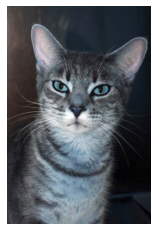

In [36]:
cat = cv2.imread('/content/cats_and_dogs_small/train/cat.586.jpg')
print("Dimensions of cat image : ",cat.shape)
plt.imshow(cat)
plt.axis("off")


Dimensions of dog image :  (320, 425, 3)


(-0.5, 424.5, 319.5, -0.5)

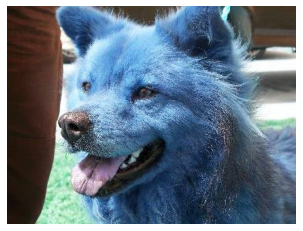

In [37]:
dog = cv2.imread('/content/cats_and_dogs_small/train/dog.45.jpg')
print("Dimensions of dog image : ",dog.shape)
plt.imshow(dog)
plt.axis("off")

In [ ]:
# Creating X(images) and y(label for each image) for training, validation and testing
# since the images are of different sizes, reshaping all the images to 224

In [43]:
import cv2
import numpy as np
from random import shuffle

IMG_SIZE = 224
LR = 1e-4

In [28]:
'cat.0.jpg'.split('.')[0]

'cat'

In [42]:
def label_img(img):
    word_label = img.split('.')[0]
    if word_label == 'dog': return 1           # labelling dog image as 1
    elif word_label == 'cat': return 0         # labelling cat image as 0

In [40]:
def createDataSplitSet(datapath):
  """This function go through all files in given directory, reads each image file, resizes it to 224 * 224 , normalzes it
  and the appends image into list 'X' and its corresponding label into list 'y' """
  X=[]
  y=[]

  for img in os.listdir(datapath):
      label = label_img(img)       # calling function label_img to create label for the given image file
      # print(label)
      path = os.path.join(datapath, img)                          # for eg: fetch this file '/content/cats_and_dogs_small/train/cat.586.jpg'
      image = cv2.resize(cv2.imread(path), (IMG_SIZE, IMG_SIZE))  # resize it to 224 * 224
      image = cv2.normalize(image, None, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)
      # cv2.normalize(source,destination,minvalue,max value, normalization type,dtype)

      X.append(np.array(image))
      y.append(label)
  return np.array(X), np.array(y)

In [44]:
train_X, train_y = createDataSplitSet(train_dir)
val_X, val_y = createDataSplitSet(validation_dir)
test_X, test_y = createDataSplitSet(test_dir)

In [46]:
print(train_X.shape)
print(val_X.shape)
print(test_X.shape)

(2000, 224, 224, 3)
(1000, 224, 224, 3)
(1000, 224, 224, 3)


In [47]:
## VGG 16
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras import Model

img_input = Input(shape=(IMG_SIZE, IMG_SIZE, 3))
img_input

<KerasTensor: shape=(None, 224, 224, 3) dtype=float32 (created by layer 'input_1')>

In [48]:
model = VGG16(
    include_top=True,
    weights="imagenet",
    input_tensor=img_input,
    input_shape=None,
    pooling=None,
    classes=1000,
    classifier_activation="softmax")
model.summary()

553467904/553467096 [==============================] - 4s 0us/step
Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
____________________________________________________________

In [49]:
last_layer = model.get_layer('fc2').output
out = Dense(1, activation='sigmoid', name='output')(last_layer)  ## 2 classes
model = Model(img_input, out)

for layer in model.layers[:-1]:
	layer.trainable = False

model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [50]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['acc'])

In [51]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
my_callbacks = [
    EarlyStopping(monitor="val_loss", patience=10, restore_best_weights=True),
    ModelCheckpoint(filepath='vgg16_model.h5', save_best_only=True),
]

In [52]:
history = model.fit(train_X, train_y,
                               batch_size=10,
                               epochs=10, 
                               validation_data=(val_X, val_y),
                               callbacks=my_callbacks)

Epoch 1/10
200/200 [==============================] - 51s 83ms/step - loss: 0.6067 - acc: 0.6630 - val_loss: 0.3453 - val_acc: 0.8510
Epoch 2/10
200/200 [==============================] - 17s 84ms/step - loss: 0.3449 - acc: 0.8472 - val_loss: 0.2831 - val_acc: 0.8740
Epoch 3/10
200/200 [==============================] - 17s 84ms/step - loss: 0.2912 - acc: 0.8788 - val_loss: 0.2560 - val_acc: 0.8860
Epoch 4/10
200/200 [==============================] - 16s 82ms/step - loss: 0.2535 - acc: 0.9007 - val_loss: 0.2509 - val_acc: 0.8880
Epoch 5/10
200/200 [==============================] - 16s 82ms/step - loss: 0.2533 - acc: 0.8984 - val_loss: 0.2345 - val_acc: 0.8950
Epoch 6/10
200/200 [==============================] - 17s 83ms/step - loss: 0.2457 - acc: 0.8924 - val_loss: 0.2206 - val_acc: 0.9020
Epoch 7/10
200/200 [==============================] - 17s 83ms/step - loss: 0.2301 - acc: 0.9130 - val_loss: 0.2368 - val_acc: 0.8910
Epoch 8/10
200/200 [==============================] - 17s 83ms

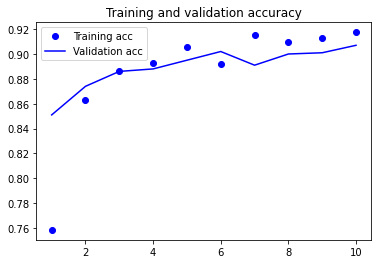

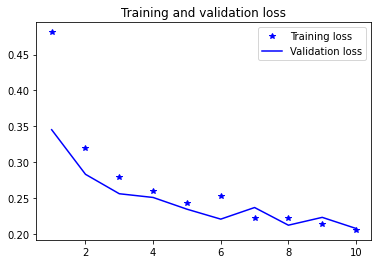

In [55]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'b*', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [58]:
from sklearn.metrics import accuracy_score

## Test Accuracy
predictions = model.predict(test_X)
#print(predictions)
ypred = predictions > 0.5
test_acc = accuracy_score(test_y, ypred)

from sklearn.metrics import precision_recall_fscore_support, roc_auc_score

precision, recall, f1score, _ = precision_recall_fscore_support(test_y, ypred, average='binary')

auc = roc_auc_score(test_y, ypred)

print("Train Accuracy:\t", acc[-1])
print("Val Accuracy:\t", val_acc[-1])
print("Test Accuracy:\t", test_acc)
print("Precision:\t", precision)
print("Recall:\t\t", recall)
print("F1 Score:\t", f1score)
print("AUC:\t\t", auc)

Train Accuracy:	 0.9175000190734863
Val Accuracy:	 0.9070000052452087
Test Accuracy:	 0.909
Precision:	 0.918200408997955
Recall:		 0.898
F1 Score:	 0.9079878665318504
AUC:		 0.909
